# Sentiment Analysis (CV-TF_IDF-HASH)  - Natural Language Processing 

### Import necessary libraries

In [3]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
#import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
#import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
#nlp = spacy.load('en', parse=True, tag=True, entity=True)

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Reading the Cleaned Dataset

In [4]:
# Read the file
df3 = pd.read_csv('D:\GENEL\SPRINGBOARD\PROJECTS\CAPSTONE PROJECTS\CAPSTONE PROJECT-2/Reduced_Cleaned_Reviews_Home_and_Kitchen.csv')

In [6]:
# Sample observations
df3.head(3)

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,clean_text,year,rating_class_num,token,review_length,review_length_bin
0,A13WOT3RSXKRD5,B00000JGRT,5.0,2 is better than 1 I bought 2 of these so I wo...,0,0,good,better bought would always one chilled ready g...,2011,1,"['better', 'bought', 'would', 'always', 'one',...",142,"(100, 200]"
1,A3U029B8Z5WGI2,B00002N602,5.0,Great Pressure Cooker It's been several months...,2,0,good,great pressure cooker several month since purc...,2010,1,"['great', 'pressure', 'cooker', 'several', 'mo...",108,"(100, 200]"
2,A3J813UTQZ2ENT,B00002N602,2.0,Lightning deal is good...but this 4 quart pot ...,1,2,bad,lightning deal good quart pot small anything f...,2013,0,"['lightning', 'deal', 'good', 'quart', 'pot', ...",102,"(100, 200]"


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8933 entries, 0 to 8932
Data columns (total 13 columns):
customer             8933 non-null object
product              8933 non-null object
rating               8933 non-null float64
review_text          8933 non-null object
pos_feedback         8933 non-null int64
neg_feedback         8933 non-null int64
rating_class         8933 non-null object
clean_text           8933 non-null object
year                 8933 non-null int64
rating_class_num     8933 non-null int64
token                8933 non-null object
review_length        8933 non-null int64
review_length_bin    8933 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 907.3+ KB


In [8]:
# Drop unnecessary columns
df4 = df3.drop(['rating', 'pos_feedback', 'neg_feedback','rating_class_num','review_length','review_length_bin'], axis=1)

In [9]:
df4.head()

,customer,product,review_text,rating_class,clean_text,year,token
0,A13WOT3RSXKRD5,B00000JGRT,2 is better than 1 I bought 2 of these so I wo...,good,better bought would always one chilled ready g...,2011,"['better', 'bought', 'would', 'always', 'one',..."
1,A3U029B8Z5WGI2,B00002N602,Great Pressure Cooker It's been several months...,good,great pressure cooker several month since purc...,2010,"['great', 'pressure', 'cooker', 'several', 'mo..."
2,A3J813UTQZ2ENT,B00002N602,Lightning deal is good...but this 4 quart pot ...,bad,lightning deal good quart pot small anything f...,2013,"['lightning', 'deal', 'good', 'quart', 'pot', ..."
3,A3U4GW06XNSI2Q,B00004OCIX,ergonomically designed to work love the design...,good,ergonomically designed work love design scoop ...,2011,"['ergonomically', 'designed', 'work', 'love', ..."
4,ACVDL5QRCOPE1,B00004OCIX,Not very sturdy My son works at a ice cream sh...,bad,not sturdy son work ice cream shop recieved ic...,2011,"['not', 'sturdy', 'son', 'work', 'ice', 'cream..."


In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8933 entries, 0 to 8932
Data columns (total 7 columns):
customer        8933 non-null object
product         8933 non-null object
review_text     8933 non-null object
rating_class    8933 non-null int64
clean_text      8933 non-null object
year            8933 non-null int64
token           8933 non-null object
dtypes: int64(2), object(5)
memory usage: 488.6+ KB


# Natural Language Processing

## 1. Feature Engineering and Selection

Machine Learning models take numerical values as input. Our dataset is a list of sentences, so in order for our algorithm to extract patterns from the data, we first need to find a way to represent it in a way that our algorithm can understand, i.e. as a list of numbers.

We will implement CounterVectorizer, TF-IDF, Hash Vectorizer, Word2Vec, adding most common words into the stopwords list, SMOTE, PCA, and Truncated SVD techniques into our models in the following sections as a part of feature engineering and selection.

## 2. Data Preprocessing

### Separating Response Variable and Feature

In [10]:
df4['rating_class'] = df4['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [11]:
# Splitting the Data Set into Train and Test Sets
X = df4['clean_text']
y = df4['rating_class']

### Splitting Dataset into Train and Test Set

We split our data in to a training set used to fit our model and a test set to see how well it generalizes to unseen data.

In [12]:
# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(6699,)
Test Set Shape		:(2234,)


## 3. Selecting the Right Evaluation Metric

Since the data is imbalanced, the evaluation of the classifier performance must be carried out using adequate metrics in order to take into account the class distribution and to pay more attention to the minority class. When the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of negatives examples is less important to the problem) we should use precision and recall. For our particular case, based on this thought I will use f1 score which is harmonic average of precision and recall as my evaluation metric.

### Confusion Matrix Plot Function

Understanding the types of errors our model makes, and least desirable are important . A good way to visualize that information is using a Confusion Matrix, which compares the predictions our model makes with the true label. With that in mind, we used confusion matrix besides our evaluation metric (f1 score).

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [58]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

## 4. Modelling

This is a supervised binary classification problem. We are trying to predict the sentiment based on the reviews left by customers who bought home and kitchen products in Amazon e-commerce online platform. We used Python’s Scikit Learn libraries to solve the problem. In this context, we implemented Logistic Regression, Random Forest, Naive Bayes, XGBOOST, and Catboost algorithms. Besides that, I implemented deep learning technique with Keras.

Since the ratings of the reviews were not distributed normally, I decided to decrease rating classes from 5 to 2 by merging Rating 1-2 as ‘Bad’ and Rating 3-4-5 as 'Good'.

For feature selection, I applied threshold for word occurence with using min_df/max_df, PCA and Singular Value Decomposition.

For feature engineering, I applied CountVectorizer, TF-IDF, Hashing Vectorizer and Word2Vec to the text data in order to turn a collection of text documents into numerical feature vectors.

## 4.1 CountVectorizer Bag of Words

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

"CountVectorizer" implements both tokenization and occurrence counting in a single class.

In [16]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [17]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 17453


In [18]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [19]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,aa,aaa,aaargh,aand,aaroma,ab,aback,abate,abhor,ability,...,zojirushi,zombie,zone,zonesturdy,zoodles,zoom,zucchini,zuchinni,zutto,zyliss
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating a function for applying different algorithms

In [30]:

def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

### Dummy Classifier

In [32]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

ValueError: could not convert string to float: 'quick chopping work wonderfully hard boiled egg raw potato doe seem like hinge could little sturdier right like chopper immensely made quick work cubing potato big square well dicing egg egg salad much faster knife tiny cut not sure would use tiny hole something hard celery ha string would not chance based review said broke thing want dice great far'

In [33]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

### 4.1.1 Logistic Regression with CountVectorizer

In [34]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.937147179428278


#### Classification Report

In [35]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

             precision    recall  f1-score   support

          0       0.75      0.79      0.76       294
          1       0.97      0.96      0.96      1940

avg / total       0.94      0.94      0.94      2234



#### Confusion Matrix

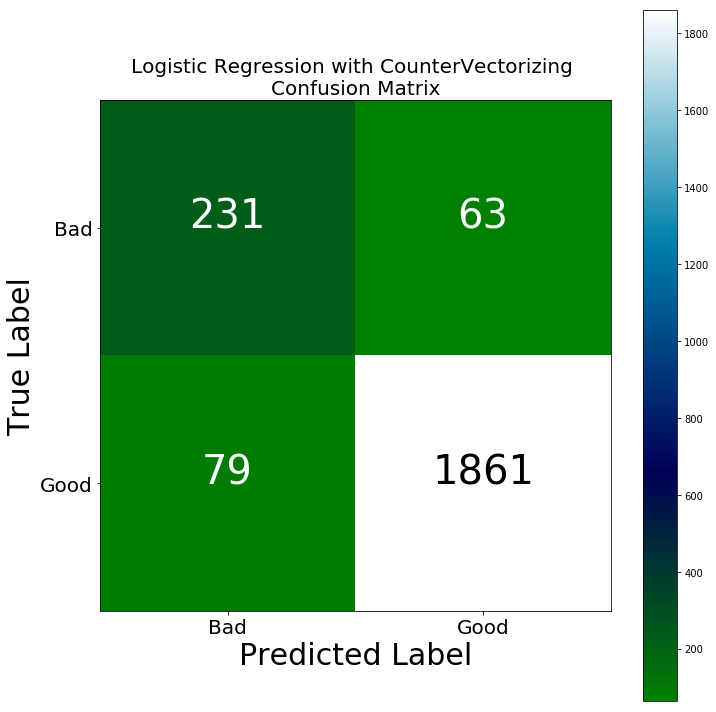

In [70]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

### 4.1.2 Random Forest with CountVectorizer¶

In [71]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.8731779071858317


#### Classification Report

In [72]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

             precision    recall  f1-score   support

          0       1.00      0.24      0.39       294
          1       0.90      1.00      0.95      1940

avg / total       0.91      0.90      0.87      2234



#### Confusion Matrix

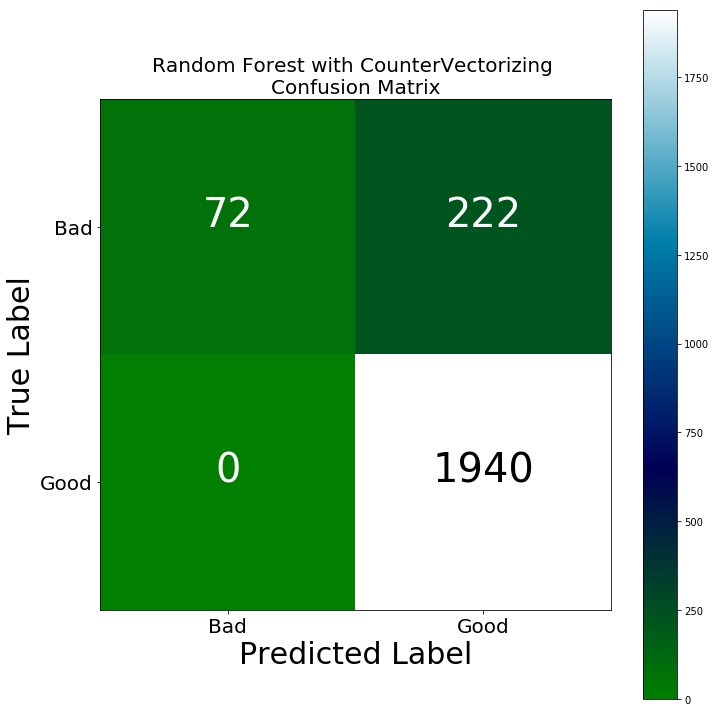

In [75]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

### 4.1.3 Naive Bayes with CountVectorizer

In [76]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.890515371287648


#### Classification Report

In [77]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

             precision    recall  f1-score   support

          0       0.56      0.66      0.60       294
          1       0.95      0.92      0.93      1940

avg / total       0.90      0.89      0.89      2234



#### Confusion Matrix

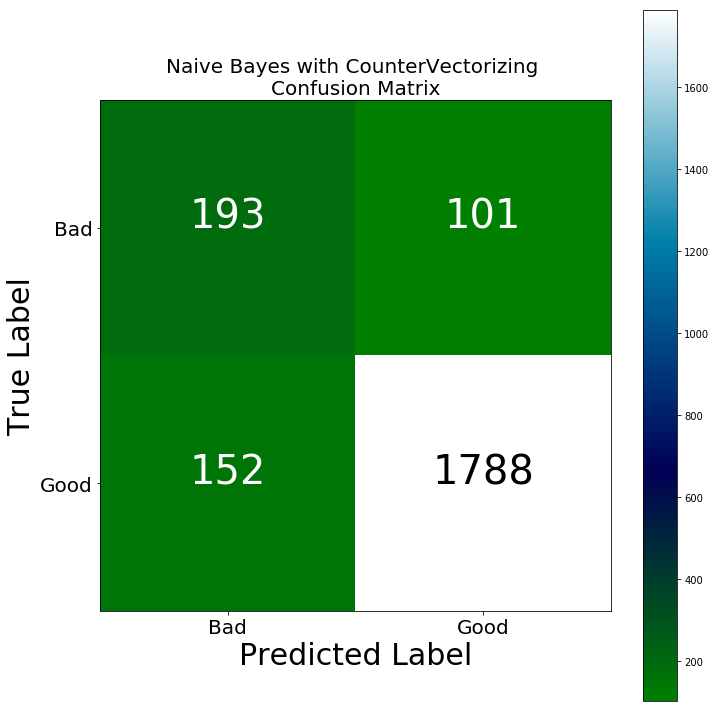

In [78]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

### 4.1.4 XGBoost with CountVectorizer

In [79]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

f1 score: 0.9285564793356548


#### Classification Report

In [80]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

             precision    recall  f1-score   support

          0       0.92      0.56      0.69       294
          1       0.94      0.99      0.96      1940

avg / total       0.93      0.94      0.93      2234



#### Confusion Matrix

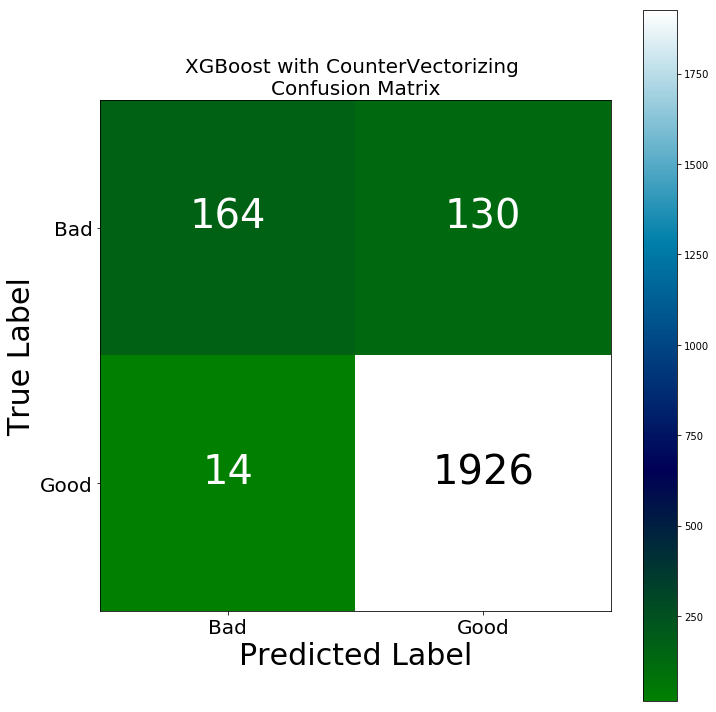

In [81]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

### 4.1.5 CatBoost with CountVectorizer

In [82]:
# Call the modeling function for CatBoost with countvectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
y_pred_cv_catboost = y_pred

0:	learn: 0.2823316	total: 1.03s	remaining: 1m 42s
1:	learn: 0.2469709	total: 1.23s	remaining: 1m
2:	learn: 0.2295175	total: 1.28s	remaining: 41.5s
3:	learn: 0.2215384	total: 1.33s	remaining: 32s
4:	learn: 0.2176911	total: 1.36s	remaining: 25.8s
5:	learn: 0.2112325	total: 1.38s	remaining: 21.6s
6:	learn: 0.2066945	total: 1.4s	remaining: 18.6s
7:	learn: 0.2041612	total: 1.42s	remaining: 16.4s
8:	learn: 0.1997437	total: 1.46s	remaining: 14.8s
9:	learn: 0.1971707	total: 1.48s	remaining: 13.3s
10:	learn: 0.1966528	total: 1.5s	remaining: 12.2s
11:	learn: 0.1950761	total: 1.55s	remaining: 11.4s
12:	learn: 0.1943645	total: 1.6s	remaining: 10.7s
13:	learn: 0.1886898	total: 1.63s	remaining: 9.99s
14:	learn: 0.1849904	total: 1.67s	remaining: 9.47s
15:	learn: 0.1840950	total: 1.69s	remaining: 8.89s
16:	learn: 0.1822703	total: 1.72s	remaining: 8.38s
17:	learn: 0.1805889	total: 1.74s	remaining: 7.92s
18:	learn: 0.1776932	total: 1.76s	remaining: 7.52s
19:	learn: 0.1738903	total: 1.79s	remaining: 7.1

#### Classification Report

In [83]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_catboost))

             precision    recall  f1-score   support

          0       0.84      0.59      0.69       294
          1       0.94      0.98      0.96      1940

avg / total       0.93      0.93      0.93      2234



#### Confusion Matrix

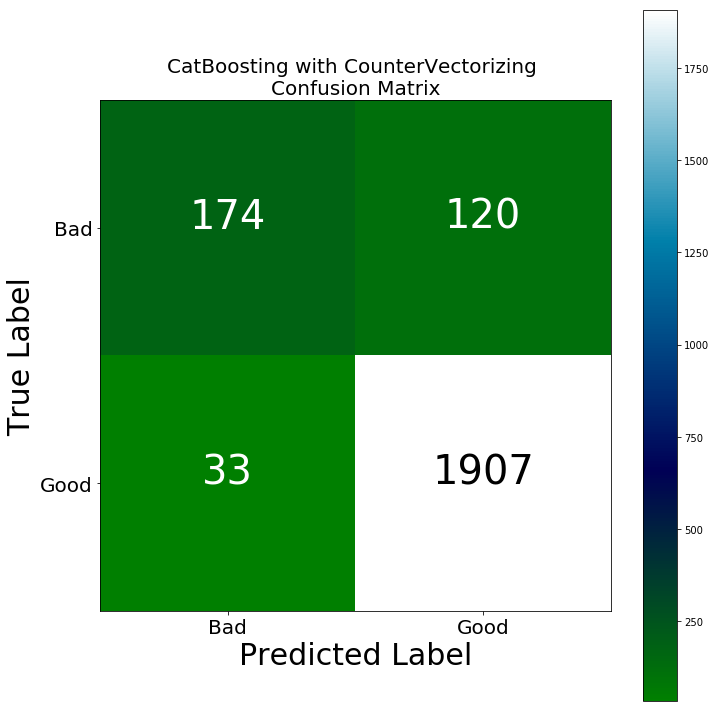

In [84]:
# Print confusion matrix for CatBoost with countVectorizer
disp_confusion_matrix(y_pred_cv_catboost, "CatBoosting")

### 4.1.6 Comparison of Models with CountVectorizer

In [85]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [86]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Function for f1 Score Plotting

In [87]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

### Algorithms Comparison with CountVectorizer

In [88]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb, y_pred_cv_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [89]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.936437 bad       0.745161  0.785714  0.764901   
                                  good      0.967256  0.959278  0.963251   
                                  average   0.938028  0.936437  0.937147   
           Random Forest 0.900627 bad       1.000000  0.244898  0.393443   
                                  good      0.897317  1.000000  0.945880   
                                  average   0.910831  0.900627  0.873178   
           Naive Bayes   0.886750 bad       0.559420  0.656463  0.604069   
                                  good      0.946533  0.921649  0.933925   
                                  average   0.895588  0.886750  0.890515   
           XGBoost       0.935542 bad       0.921348  0.557823  0.694915   
                                  good      0.936770  0.992784  0.963964   
                                  average   0.934741  0.935542  0.928556   
           CatBoost      0.931513 bad       0.840580  0.591837  0.694611   
                                  good      0.940799  0.982990  0.961432   
                                  average   0.927610  0.931513  0.926317   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.936437 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           Random Forest 0.900627 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           Naive Bayes   0.886750 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           XGBoost       0.935542 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           CatBoost      0.931513 bad        294.0  
                                  good      1940.0  
                                  average   2234.0

### Average f1 Score - Models with CountVectorizer

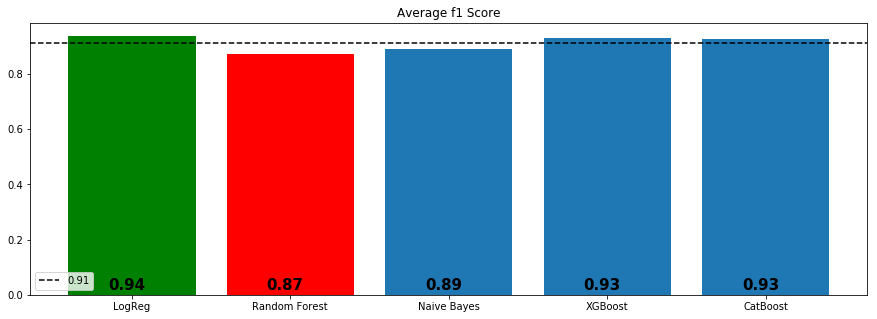

In [90]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

## 4.2 TF-IDF

In order to help our model focus more on meaningful words, we can use a TF-IDF score (Term Frequency, Inverse Document Frequency) on top of our Bag of Words model. TF-IDF weighs words by how rare they are in our dataset, discounting words that are too frequent and just add to the noise.

In [91]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

### 4.2.1 Logistic Regression with TF-IDF

In [92]:

# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.9109679275279865


#### Classification Report

In [93]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

             precision    recall  f1-score   support

          0       0.60      0.85      0.70       294
          1       0.98      0.91      0.94      1940

avg / total       0.93      0.90      0.91      2234



#### Confusion Matrix

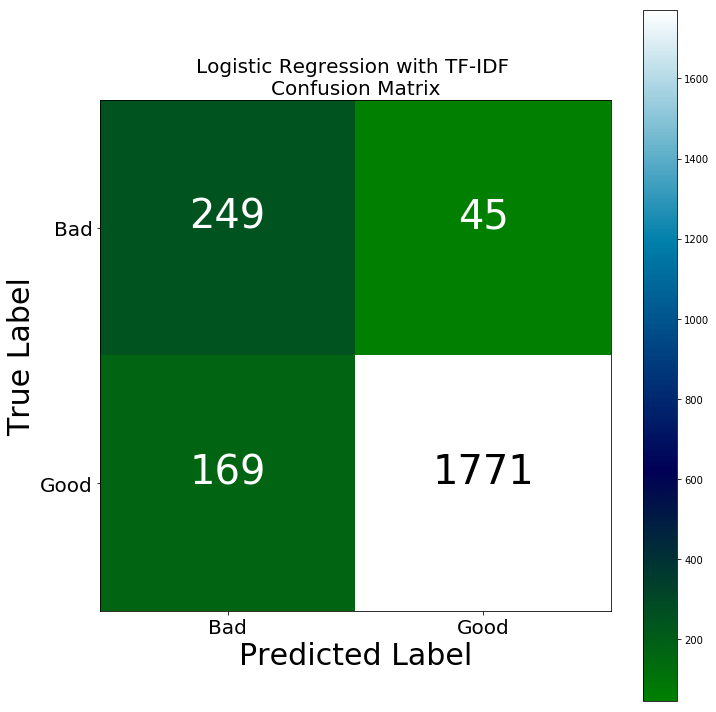

In [94]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

### 4.2.2 Random Forest with TF-IDF

In [95]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.8676560572308476


#### Classification Report

In [96]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

             precision    recall  f1-score   support

          0       1.00      0.22      0.36       294
          1       0.89      1.00      0.94      1940

avg / total       0.91      0.90      0.87      2234



#### Confusion Matrix

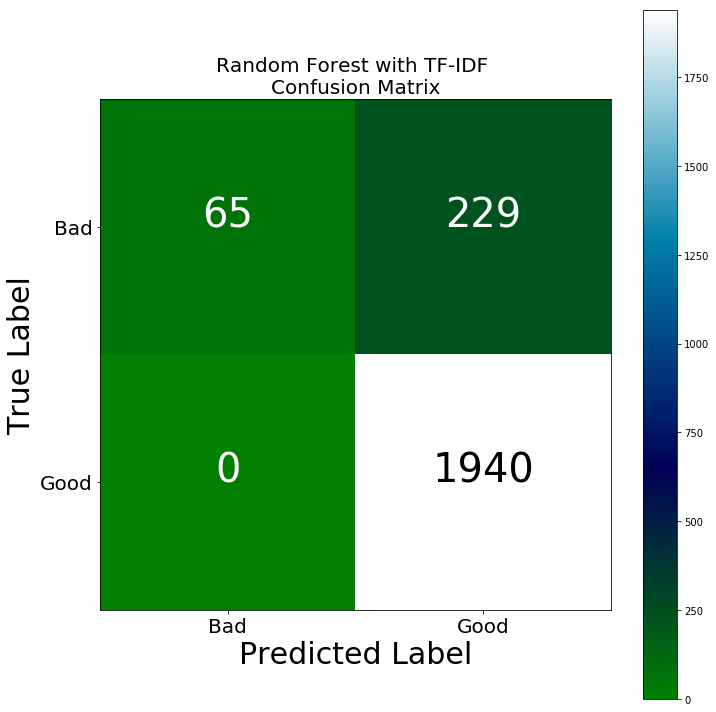

In [97]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

### 4.2.3 Naive Bayes with TF-IDF

In [98]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

f1 score: 0.8072310191538272


#### Classification Report

In [99]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       294
          1       0.87      1.00      0.93      1940

avg / total       0.75      0.87      0.81      2234



#### Confusion Matrix

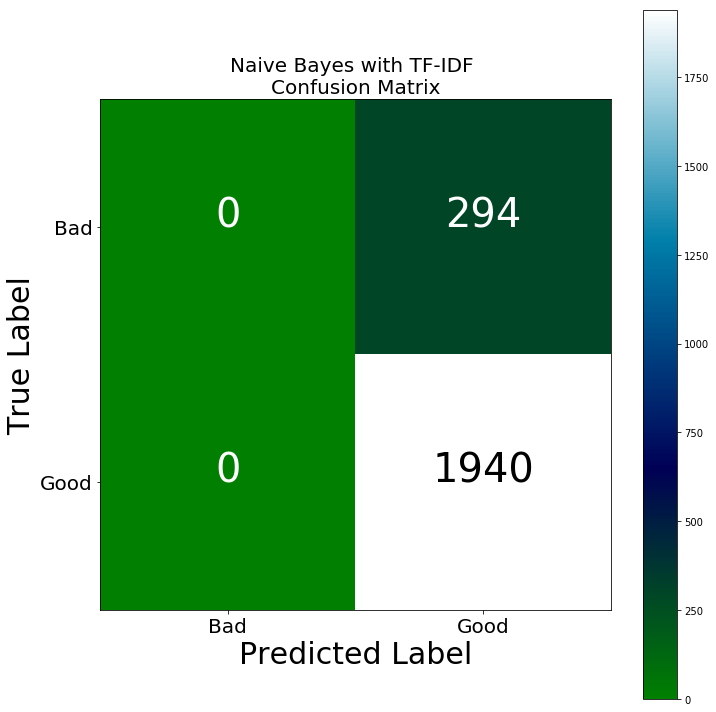

In [100]:
# Print confusion matrix for naive bayes with TF-IDF
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

### 4.2.4 XGBoost with TF-IDF

In [101]:
# Call the modeling function for XGBoost with TF-IDF and print f1 score
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_xgb = y_pred

f1 score: 0.9347939611875538


#### Classification Report

In [102]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_xgb))

             precision    recall  f1-score   support

          0       0.97      0.57      0.72       294
          1       0.94      1.00      0.97      1940

avg / total       0.94      0.94      0.93      2234



#### Confusion Matrix

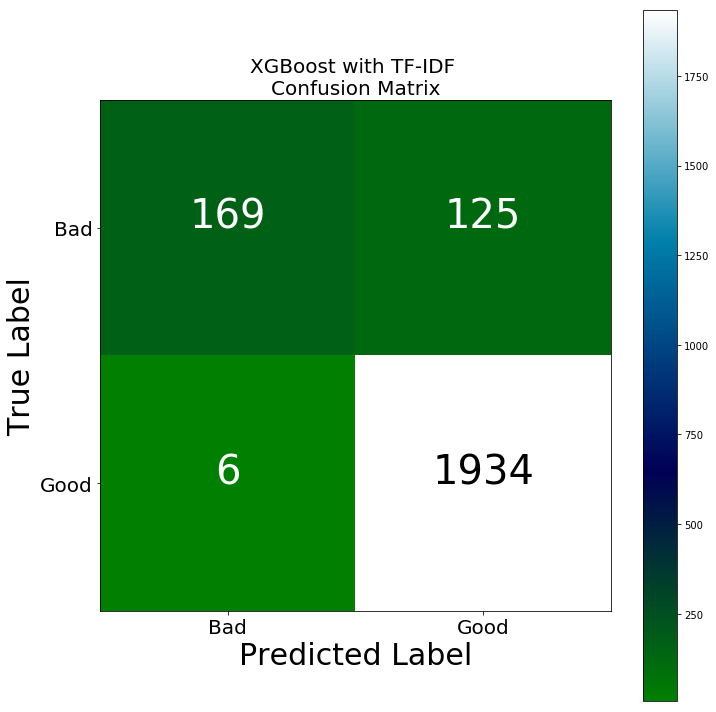

In [103]:
# Print confusion matrix for XGBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

### 4.2.5 Catboost with TF-IDF

In [104]:
# Call the modeling function for Catboost with TF-IDF and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_catboost = y_pred

0:	learn: 0.3496056	total: 43.7ms	remaining: 4.32s
1:	learn: 0.2824620	total: 97.2ms	remaining: 4.76s
2:	learn: 0.2501442	total: 150ms	remaining: 4.86s
3:	learn: 0.2339337	total: 194ms	remaining: 4.65s
4:	learn: 0.2173884	total: 242ms	remaining: 4.59s
5:	learn: 0.2094045	total: 294ms	remaining: 4.6s
6:	learn: 0.2065872	total: 341ms	remaining: 4.52s
7:	learn: 0.2019012	total: 385ms	remaining: 4.43s
8:	learn: 0.1992660	total: 429ms	remaining: 4.34s
9:	learn: 0.1964433	total: 472ms	remaining: 4.25s
10:	learn: 0.1920936	total: 517ms	remaining: 4.18s
11:	learn: 0.1859723	total: 559ms	remaining: 4.1s
12:	learn: 0.1847680	total: 601ms	remaining: 4.02s
13:	learn: 0.1827051	total: 642ms	remaining: 3.94s
14:	learn: 0.1799457	total: 692ms	remaining: 3.92s
15:	learn: 0.1784920	total: 739ms	remaining: 3.88s
16:	learn: 0.1760523	total: 785ms	remaining: 3.83s
17:	learn: 0.1743800	total: 829ms	remaining: 3.77s
18:	learn: 0.1726308	total: 869ms	remaining: 3.7s
19:	learn: 0.1713103	total: 911ms	remainin

#### Classification Report

In [105]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_catboost))

             precision    recall  f1-score   support

          0       0.82      0.56      0.67       294
          1       0.94      0.98      0.96      1940

avg / total       0.92      0.93      0.92      2234



#### Confusion Matrix

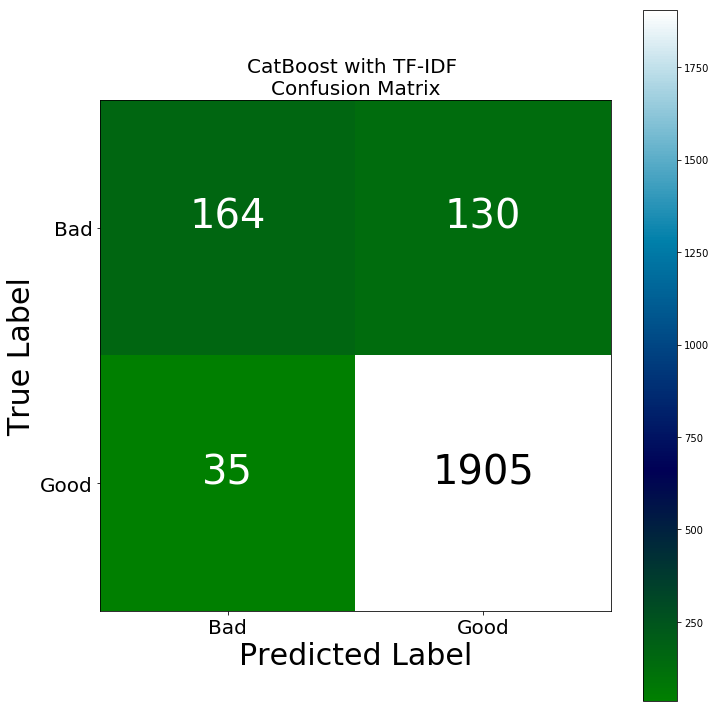

In [106]:
# Print confusion matrix for CatBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_catboost, "CatBoost", "TF-IDF")

### 4.2.6 Comparision of Models with TF-IDF Vectorizer

In [107]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb, y_pred_tfidf_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

#### Comparison Table - TF-IDF Vectorizing

In [108]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.904208 bad       0.595694  0.846939  0.699438   
                                  good      0.975220  0.912887  0.943024   
                                  average   0.925274  0.904208  0.910968   
           Random Forest 0.897493 bad       1.000000  0.221088  0.362117   
                                  good      0.894421  1.000000  0.944269   
                                  average   0.908316  0.897493  0.867656   
           Naive Bayes   0.868397 bad       0.000000  0.000000  0.000000   
                                  good      0.868397  1.000000  0.929564   
                                  average   0.754114  0.868397  0.807231   
           XGBoost       0.941361 bad       0.965714  0.574830  0.720682   
                                  good      0.939291  0.996907  0.967242   
                                  average   0.942768  0.941361  0.934794   
           CatBoost      0.926141 bad       0.824121  0.557823  0.665314   
                                  good      0.936118  0.981959  0.958491   
                                  average   0.921379  0.926141  0.919908   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.904208 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           Random Forest 0.897493 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           Naive Bayes   0.868397 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           XGBoost       0.941361 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           CatBoost      0.926141 bad        294.0  
                                  good      1940.0  
                                  average   2234.0

#### Average f1 score - Models with TF-IDF Vectorizer

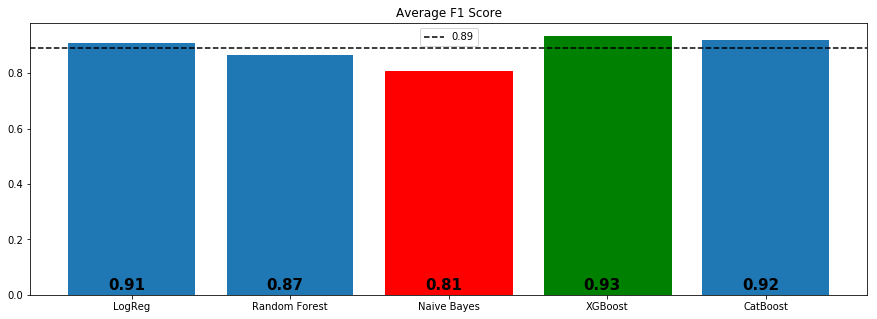

In [109]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

## 4.3 Hashing Vectorizer

Hash Vectorizer is designed to be as memory efficient as possible. Instead of storing the tokens as strings, the vectorizer applies the hashing trick to encode them as numerical indexes. The downside of this method is that once vectorized, the features’ names can no longer be retrieved.

In [110]:
# Create the word vector with Hash Vectorizer
hash_vect = HashingVectorizer(n_features=2000, ngram_range=(1,1), non_negative=True)
hash_vect_train = hash_vect.fit_transform(X_train)
hash_vect_train = hash_vect_train.toarray()
hash_vect_test = hash_vect.transform(X_test)
hash_vect_test = hash_vect_test.toarray()

## 4.3.1 Logistic Regression with Hash Vectorizer

In [111]:
# Call the modeling function for logistic regression with Hash Vectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_logreg = y_pred

f1 score: 0.8832339740855097


#### Classification Report

In [112]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_logreg))

             precision    recall  f1-score   support

          0       0.51      0.84      0.63       294
          1       0.97      0.88      0.92      1940

avg / total       0.91      0.87      0.88      2234



#### Confusion Matrix

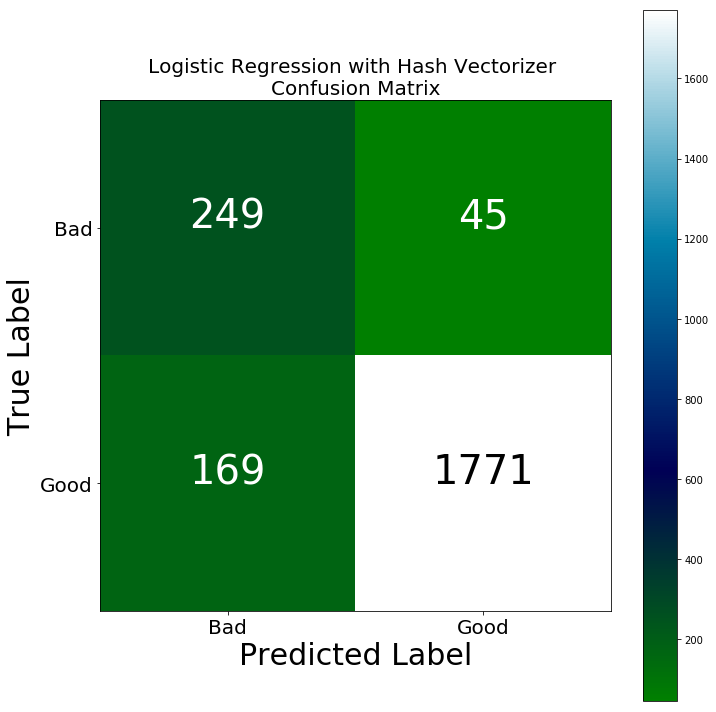

In [113]:
# Print confusion matrix for logistic regression with Hash Vectorizer
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "Hash Vectorizer")

## 4.3.2 Random Forest with Hash Vectorizer

In [114]:
# Call the modeling function for random forest classifier with Hash Vectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_rf = y_pred

f1 score: 0.8966352420057832


#### Classification Report

In [115]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_rf))

             precision    recall  f1-score   support

          0       1.00      0.35      0.52       294
          1       0.91      1.00      0.95      1940

avg / total       0.92      0.91      0.90      2234



#### Confusion Matrix

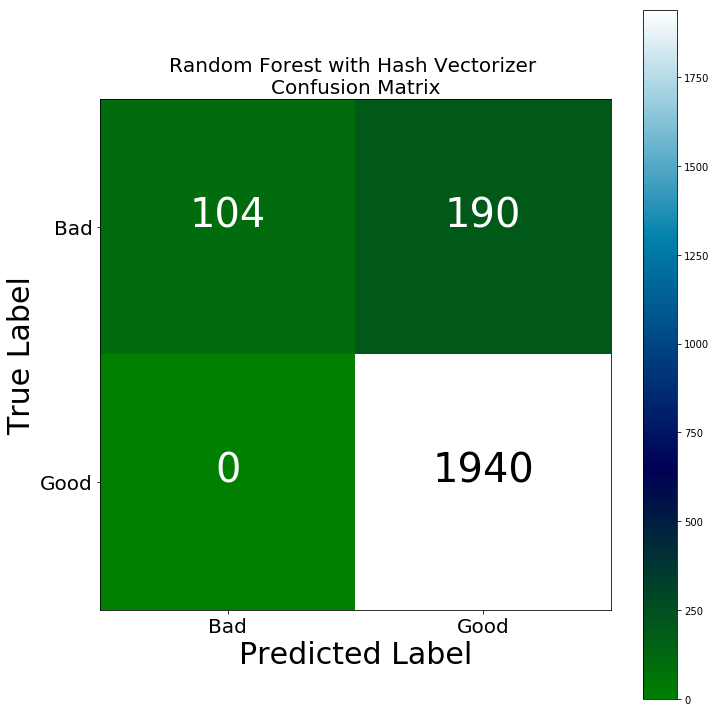

In [116]:
# Print confusion matrix for random forest classifier with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_rf, "Random Forest", "Hash Vectorizer")

## 4.3.3 Naive Bayes with Hash Vectorizer

In [117]:
# Call the modeling function for naive bayes with Hash Vectorizer and print f1 score
modeling(MultinomialNB(), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_nb = y_pred

f1 score: 0.8157534689681804


#### Classification Report

In [118]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_nb))

             precision    recall  f1-score   support

          0       1.00      0.03      0.05       294
          1       0.87      1.00      0.93      1940

avg / total       0.89      0.87      0.82      2234



#### Confusion Matrix

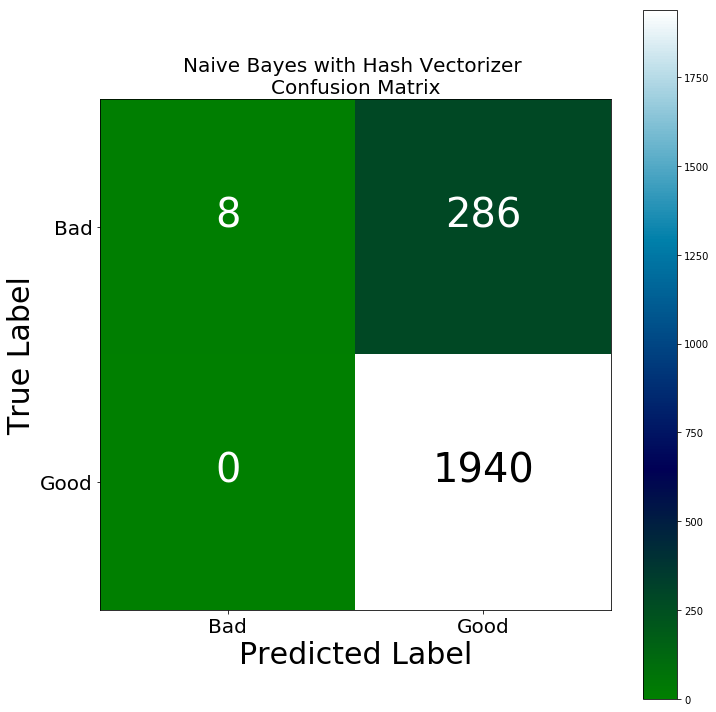

In [119]:
# Print confusion matrix for naive bayes with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_nb, "Naive Bayes", "Hash Vectorizer")

## 4.3.4 XGBoost with Hash Vectorize

In [120]:
# Call the modeling function for XGBoost with Hash Vectorizer and print f1 score
modeling(XGBClassifier(), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_xgb = y_pred

f1 score: 0.9410924636522034


#### Classification Report

In [121]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_xgb))

             precision    recall  f1-score   support

          0       0.96      0.62      0.75       294
          1       0.94      1.00      0.97      1940

avg / total       0.95      0.95      0.94      2234



#### Confusion Matrix

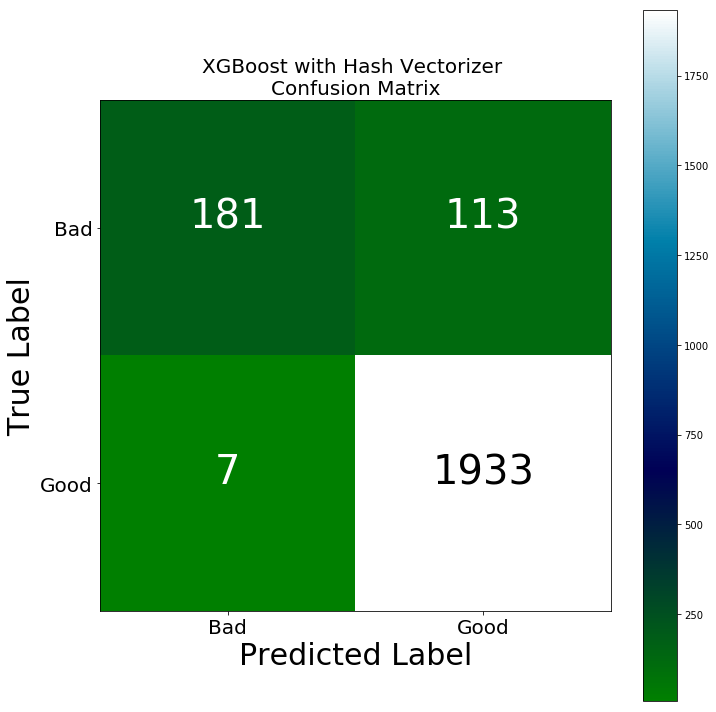

In [122]:
# Print confusion matrix for XGBoost with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_xgb, "XGBoost", "Hash Vectorizer")

## 4.3.5 CatBoost with Hash Vectorizer

In [123]:
# Call the modeling function for Catboost with Hash Vectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_catboost = y_pred

0:	learn: 0.3673323	total: 39.2ms	remaining: 3.88s
1:	learn: 0.3089473	total: 66.4ms	remaining: 3.25s
2:	learn: 0.2728417	total: 90.3ms	remaining: 2.92s
3:	learn: 0.2503904	total: 117ms	remaining: 2.8s
4:	learn: 0.2391240	total: 145ms	remaining: 2.76s
5:	learn: 0.2314658	total: 173ms	remaining: 2.71s
6:	learn: 0.2235813	total: 198ms	remaining: 2.63s
7:	learn: 0.2180173	total: 223ms	remaining: 2.56s
8:	learn: 0.2080135	total: 251ms	remaining: 2.54s
9:	learn: 0.2070556	total: 275ms	remaining: 2.47s
10:	learn: 0.2034283	total: 300ms	remaining: 2.43s
11:	learn: 0.1947089	total: 324ms	remaining: 2.38s
12:	learn: 0.1878081	total: 356ms	remaining: 2.38s
13:	learn: 0.1866096	total: 383ms	remaining: 2.35s
14:	learn: 0.1851889	total: 407ms	remaining: 2.31s
15:	learn: 0.1826413	total: 434ms	remaining: 2.28s
16:	learn: 0.1797767	total: 458ms	remaining: 2.24s
17:	learn: 0.1770790	total: 487ms	remaining: 2.22s
18:	learn: 0.1754734	total: 511ms	remaining: 2.18s
19:	learn: 0.1742947	total: 539ms	remai

#### Classification Report

In [124]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_catboost))

             precision    recall  f1-score   support

          0       0.85      0.59      0.69       294
          1       0.94      0.98      0.96      1940

avg / total       0.93      0.93      0.93      2234



#### Confusion Matrix

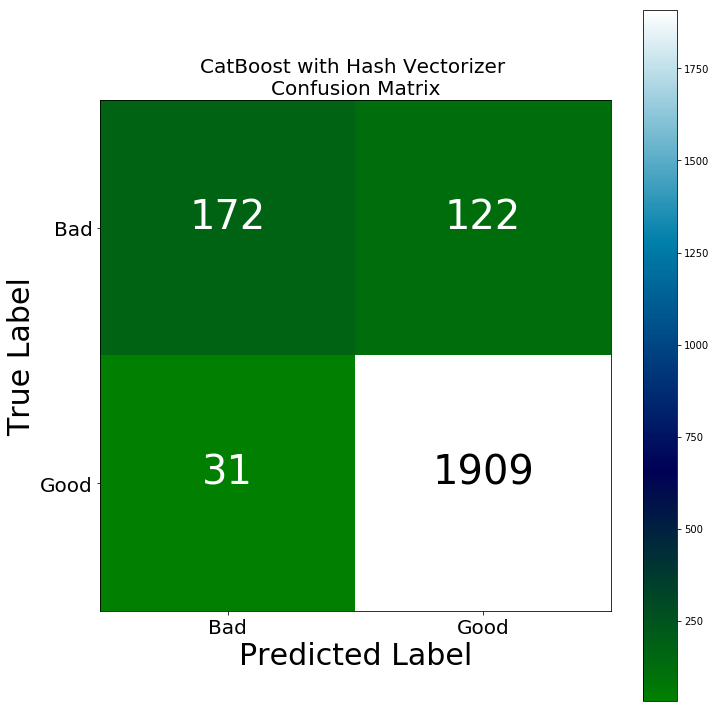

In [125]:
# Print confusion matrix for CatBoost with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_catboost, "CatBoost", "Hash Vectorizer")

## 4.3.6 Comparison of Models with Hash Vectorizer

In [126]:
comparison_table(y_preds = [y_pred_hash_logreg, y_pred_hash_rf, y_pred_hash_nb, y_pred_hash_xgb, y_pred_hash_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

#### Comparison Table

In [127]:
# Print the comparision matrix
print('\nComparision Matrix of Models with Hash Vectorizer\n')
df_tv2


Comparision Matrix of Models with Hash Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.870636 bad       0.505133  0.836735  0.629962   
                                  good      0.972524  0.875773  0.921616   
                                  average   0.911015  0.870636  0.883234   
           Random Forest 0.914951 bad       1.000000  0.353741  0.522613   
                                  good      0.910798  1.000000  0.953317   
                                  average   0.922537  0.914951  0.896635   
           Naive Bayes   0.871979 bad       1.000000  0.027211  0.052980   
                                  good      0.871518  1.000000  0.931349   
                                  average   0.888427  0.871979  0.815753   
           XGBoost       0.946285 bad       0.962766  0.615646  0.751037   
                                  good      0.944770  0.996392  0.969895   
                                  average   0.947139  0.946285  0.941092   
           CatBoost      0.931513 bad       0.847291  0.585034  0.692153   
                                  good      0.939931  0.984021  0.961471   
                                  average   0.927739  0.931513  0.926028   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.870636 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           Random Forest 0.914951 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           Naive Bayes   0.871979 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           XGBoost       0.946285 bad        294.0  
                                  good      1940.0  
                                  average   2234.0  
           CatBoost      0.931513 bad        294.0  
                                  good      1940.0  
                                  average   2234.0

#### Average f1 score - Hash Vectorizer

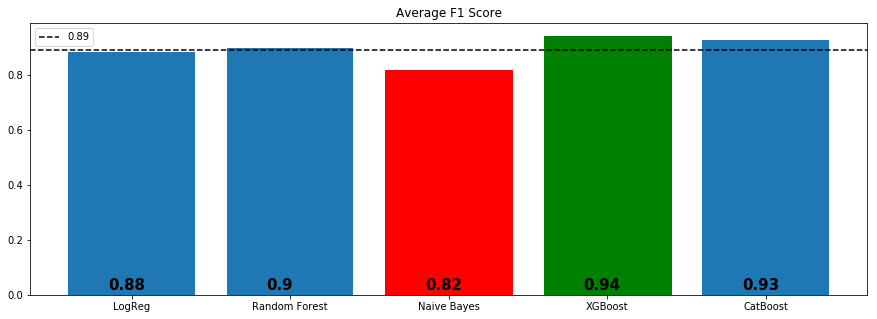

In [128]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")